# Network Graph

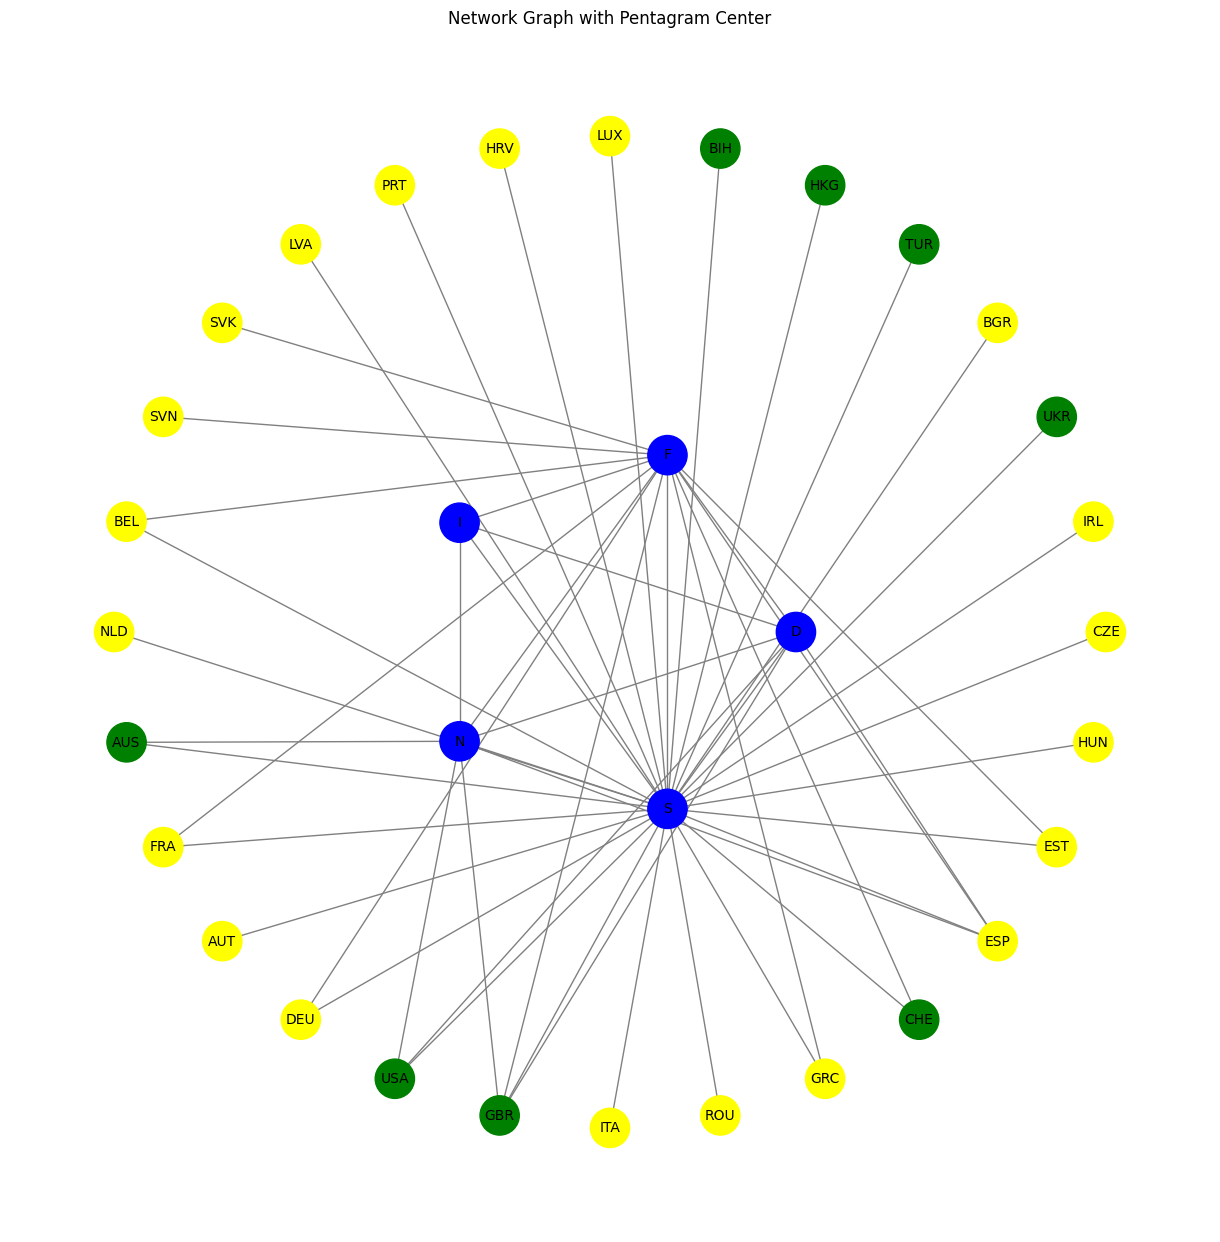

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Manually add the data
data_dict = {
    'LABELS': ['D', 'F', 'I', 'N', 'S'],
    'N': [3, 1, 0, 0, 5],
    'D': [0, 2, 0, 2, 4],
    'F': [3, 0, 0, 2, 3],
    'I': [1, 1, 0, 1, 3],
    'S': [3, 1, 0, 2, 0],
    'AUT': [0, 0, 0, 0, 2],
    'BEL': [0, 1, 0, 0, 2],
    'BIH': [0, 0, 0, 0, 2],
    'BGR': [0, 0, 0, 0, 2],
    'HRV': [0, 0, 0, 0, 2],
    'CZE': [0, 0, 0, 0, 2],
    'EST': [0, 1, 0, 0, 2],
    'FRA': [0, 1, 0, 0, 2],
    'DEU': [0, 1, 0, 0, 2],
    'GRC': [0, 1, 0, 0, 2],
    'HUN': [0, 0, 0, 0, 2],
    'IRL': [0, 0, 0, 0, 2],
    'ITA': [0, 0, 0, 0, 2],
    'LVA': [0, 0, 0, 0, 2],
    'LUX': [0, 0, 0, 0, 2],
    'NLD': [0, 0, 0, 0, 2],
    'PRT': [0, 0, 0, 0, 2],
    'ROU': [0, 0, 0, 0, 2],
    'SVK': [0, 1, 0, 0, 0],
    'SVN': [0, 1, 0, 0, 0],
    'ESP': [1, 2, 0, 1, 2],
    'CHE': [0, 1, 0, 0, 2],
    'TUR': [0, 0, 0, 0, 2],
    'UKR': [0, 0, 0, 0, 2],
    'GBR': [2, 2, 0, 2, 3],
    'AUS': [0, 0, 0, 1, 1],
    'HKG': [0, 0, 0, 0, 1],
    'USA': [1, 0, 0, 1, 1]
}

# Convert the dictionary to a DataFrame
data = pd.DataFrame(data_dict)

# Define node groups
pentagram_nodes = ['D', 'F', 'I', 'N', 'S']
blue_nodes = pentagram_nodes
green_nodes = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA']
yellow_nodes = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']

# Create the graph
G = nx.Graph()

# Add nodes
for node in data['LABELS']:
    G.add_node(node)

# Add edges based on non-zero values in the data
for i, row in data.iterrows():
    source = row['LABELS']
    for target in data.columns[1:]:  # Skip 'LABELS' column
        if row[target] > 0:
            G.add_edge(source, target)

# Position the pentagram nodes in a pentagon shape at the center
pentagram_pos = {}
angle_step = 2 * np.pi / 5
radius = 1.5  # Radius for pentagon
for i, node in enumerate(pentagram_nodes):
    angle = i * angle_step
    pentagram_pos[node] = (radius * np.cos(angle), radius * np.sin(angle))

# Position the other nodes in a circle around the pentagram
outer_nodes = list(set(G.nodes) - set(pentagram_nodes))
outer_pos = {}
angle_step_outer = 2 * np.pi / len(outer_nodes)
radius_outer = 4  # Radius for outer circle
for i, node in enumerate(outer_nodes):
    angle = i * angle_step_outer
    outer_pos[node] = (radius_outer * np.cos(angle), radius_outer * np.sin(angle))

# Combine positions
pos = {**pentagram_pos, **outer_pos}

# Define node colors
node_colors = []
for node in G.nodes:
    if node in blue_nodes:
        node_colors.append('blue')
    elif node in green_nodes:
        node_colors.append('green')
    elif node in yellow_nodes:
        node_colors.append('yellow')
    else:
        node_colors.append('gray')  # Default color for undefined nodes

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, font_size=10, edge_color='gray')
plt.title('Network Graph with Pentagram Center')
plt.show()
